### 1.Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
students = pd.read_csv("StudentsPerformance.csv")
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


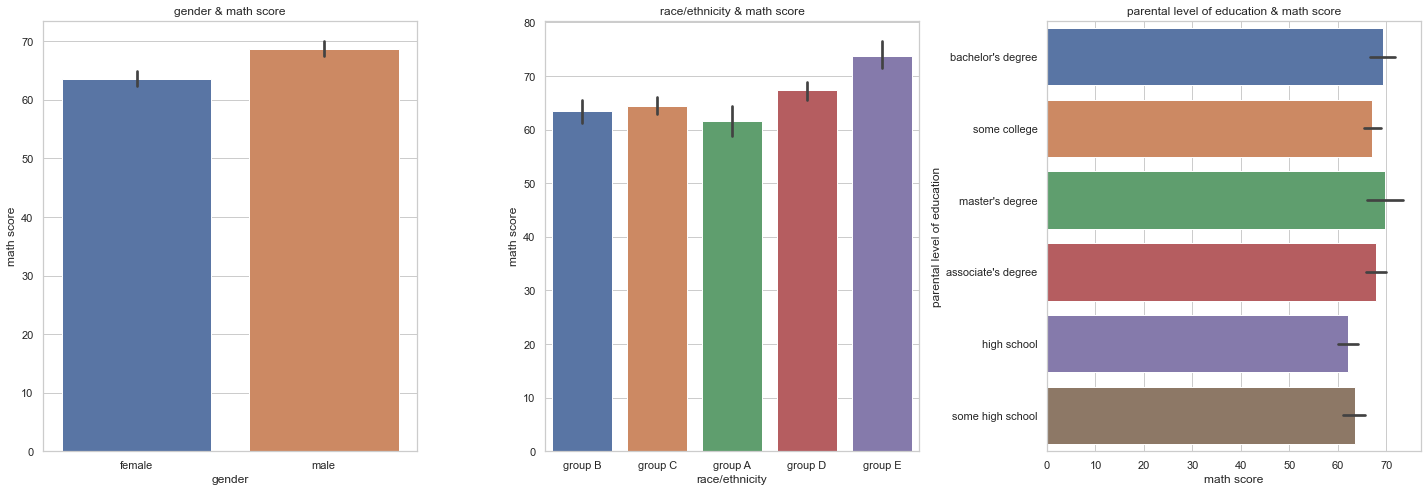

In [21]:
## math scoru için:

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot("gender","math score" , data=students)
plt.title("gender & math score")

plt.subplot(1,3,2)
sns.barplot("race/ethnicity" , "math score", data=students)
plt.title("race/ethnicity & math score")

plt.subplot(1,3,3)
sns.barplot(y="parental level of education",x="math score", data=students)
plt.title("parental level of education & math score")

plt.tight_layout()

plt.show()

In [ ]:
# 1.grafik : erkekler math scoru için daha basarılı
# 2.grafik : group E etnik kökenli oalnlar daha basarılı
# 3.grafik :ebeveynleri lisans ve master mezunu olanlar daha basarılı

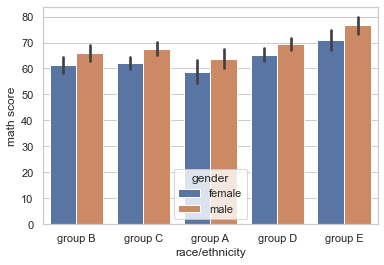

In [25]:
sns.barplot(students["race/ethnicity"],students["math score"],students["gender"])
plt.show()                                                                   #cinsiyeti erkek olup E etnik köken daha basarılı

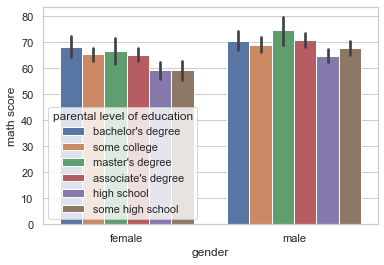

In [24]:
sns.barplot(students["gender"],students["math score"],students["parental level of education"])
plt.show()

# cinsiyeti erkek olup ebeveyni master mezunu olan daha basarılı,math scoru için diyebiliriz ki ebeyeni master mezunu olan etnik
#etnik kökeni E olan erkek öğrenciler diğerlerinden daha basarılı.

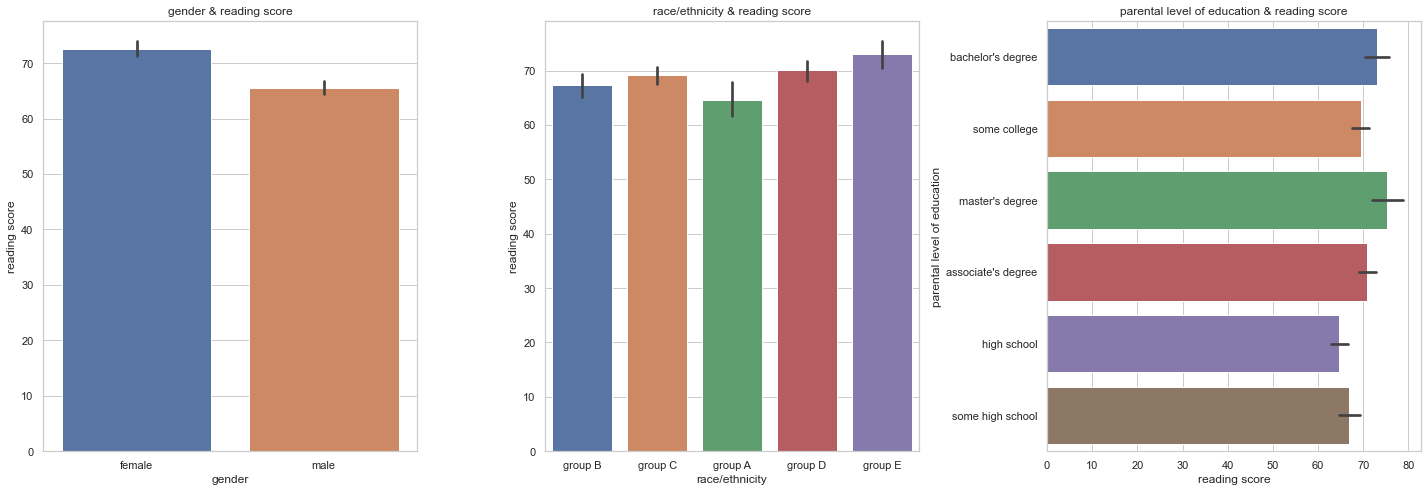

In [26]:
## reading score için:

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot("gender","reading score" , data=students)
plt.title("gender & reading score")

plt.subplot(1,3,2)
sns.barplot("race/ethnicity" , "reading score", data=students)
plt.title("race/ethnicity & reading score")

plt.subplot(1,3,3)
sns.barplot(y="parental level of education",x="reading score", data=students)
plt.title("parental level of education & reading score")

plt.tight_layout()

plt.show()

In [ ]:
#reading scoru için kadınların,
#etnik kökeni E olanların,
#ebeveyni master mezunu olanların daha basarılı oldugu görülüyor

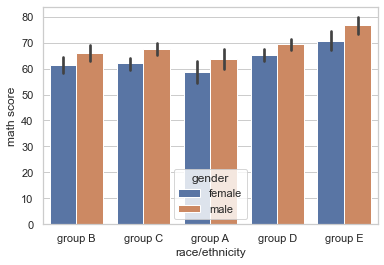

In [27]:
sns.barplot(students["race/ethnicity"],students["math score"],students["gender"])
plt.show()  #en basarılı olanlar E grubu ve kadın olanlar,en basarısız da A grubu ve erkek olanlar

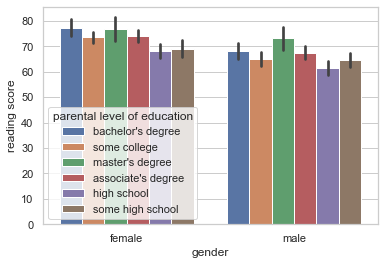

In [30]:
sns.barplot(students["gender"],students["reading score"],students["parental level of education"])
plt.show()  

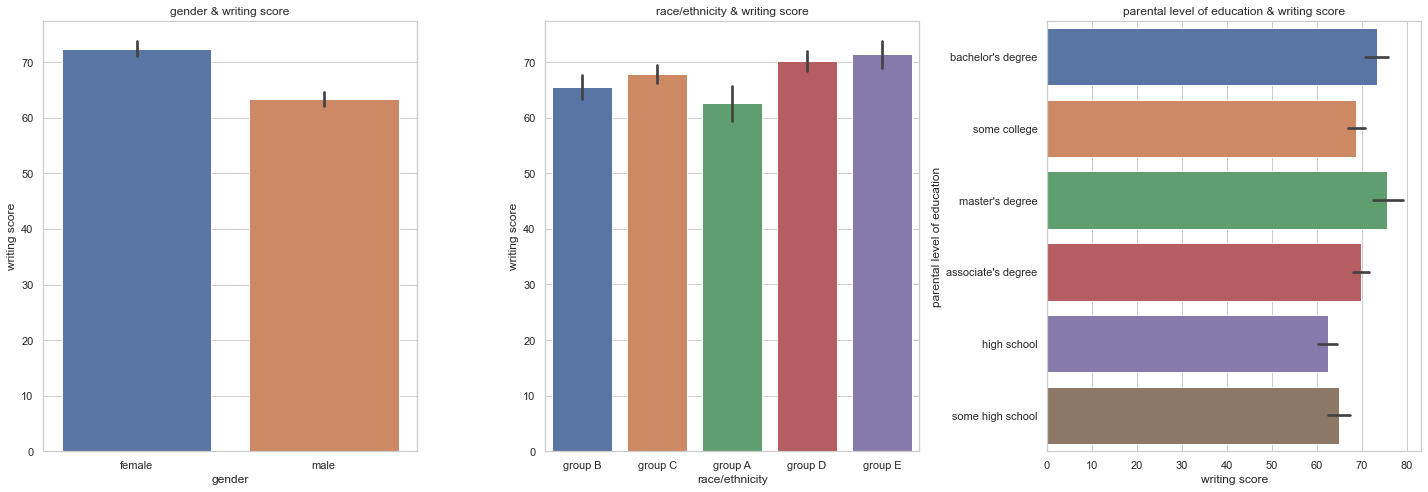

In [31]:
## writing score için:

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot("gender","writing score" , data=students)
plt.title("gender & writing score")

plt.subplot(1,3,2)
sns.barplot("race/ethnicity" , "writing score", data=students)
plt.title("race/ethnicity & writing score")

plt.subplot(1,3,3)
sns.barplot(y="parental level of education",x="writing score", data=students)
plt.title("parental level of education & writing score")

plt.tight_layout()

plt.show()

In [ ]:
# diğer reading scorunda oldugu gibi kadın,group e ve ebeveyni master mezunu olan öğrenciler daha basarılı.

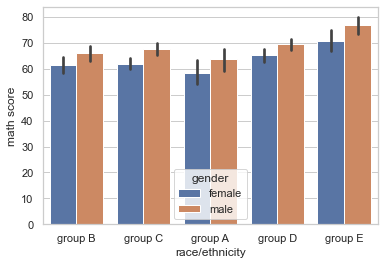

In [32]:
sns.barplot(students["race/ethnicity"],students["math score"],students["gender"])
plt.show() 

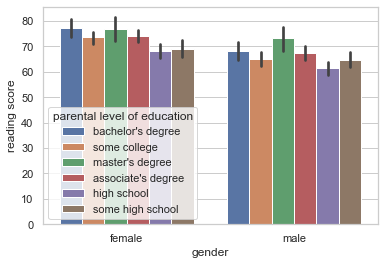

In [33]:
sns.barplot(students["gender"],students["reading score"],students["parental level of education"])
plt.show() 

In [ ]:
#3 score için de:
# "gender,parental level of education,race/ethnicity" değişkenleri önemli.

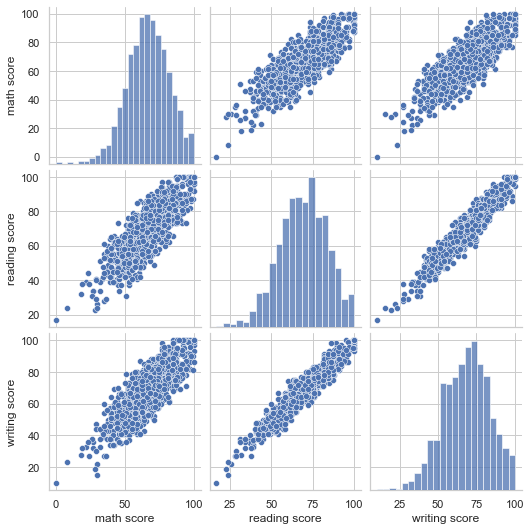

In [85]:
sns.pairplot(students)     #3 score da birbirleriyle pozitif ilişkili
plt.show()

### 2.Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

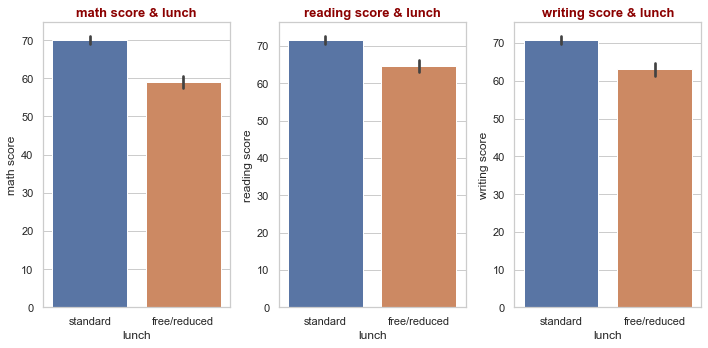

In [59]:
plt.figure(figsize=(10,5))                               #3 score için de standart öğle yemeğine sahip öğrenciler daha basarılı
plt.subplot(131)
sns.barplot("lunch","math score",data=students)
plt.title("math score & lunch",fontdict=baslik_font)

plt.subplot(132)
sns.barplot("lunch","reading score",data=students)
plt.title("reading score & lunch",fontdict=baslik_font)

plt.subplot(133)
sns.barplot("lunch","writing score",data=students)
plt.title("writing score & lunch",fontdict=baslik_font)

plt.tight_layout()
plt.show()

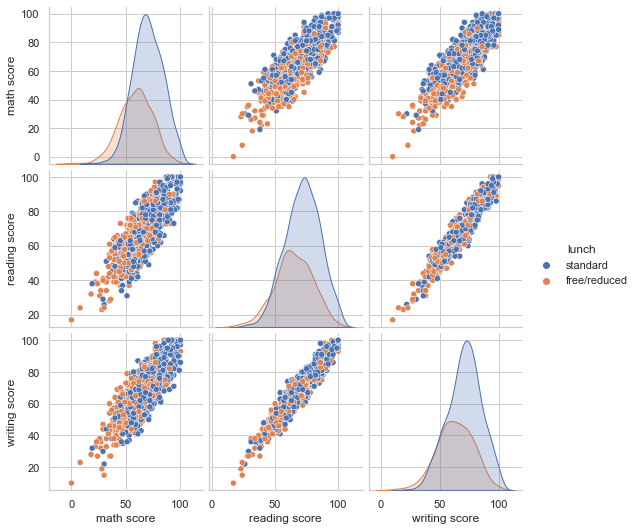

In [80]:
sns.pairplot(students,hue="lunch")
plt.show()

### 3.Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?

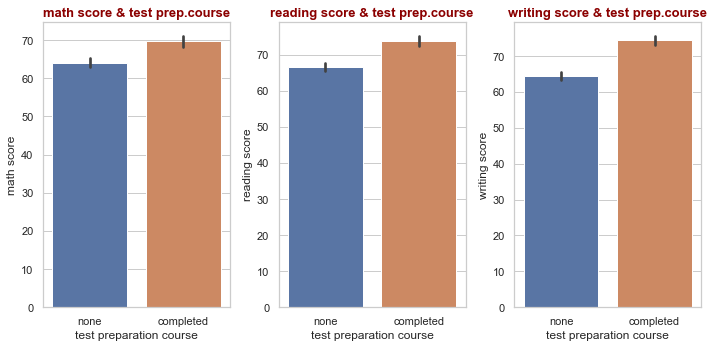

In [63]:

plt.figure(figsize=(10,5))                               #3 score için de kurs alan öğrenciler daha basarılı
plt.subplot(131)
sns.barplot("test preparation course","math score",data=students)
plt.title("math score & test prep.course",fontdict=baslik_font)

plt.subplot(132)
sns.barplot("test preparation course","reading score",data=students)
plt.title("reading score & test prep.course",fontdict=baslik_font)

plt.subplot(133)
sns.barplot("test preparation course","writing score",data=students)
plt.title("writing score & test prep.course",fontdict=baslik_font)

plt.tight_layout()
plt.show()


### 4.Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [66]:
s_corr = students.corr()
s_corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


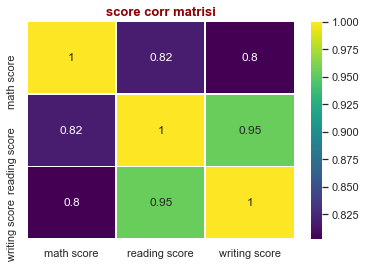

In [73]:
sns.heatmap(s_corr,annot=True,linewidth=0.7,cmap="viridis")
plt.title("score corr matrisi",fontdict=baslik_font)             #aralarında en cok korelasyon bulunan değişkenler 0.95 ile 
                                                                 #reading score ve writing score
plt.show()